# TP 2 Exercice 1 : Flower Power

## 1. Importation des bibliothèques nécessaires

In [1]:
# Import des bibliothèques nécessaires
import os
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

## 2. Téléchargement des données

In [ ]:
import os
import zipfile

# Définir le dataset Kaggle et le répertoire cible
dataset = "alxmamaev/flowers-recognition"
output_dir = "flowers"

# Télécharger le dataset
os.system(f"kaggle datasets download -d {dataset} -p {output_dir}")

# Extraire les fichiers ZIP
zip_path = os.path.join(output_dir, "flowers-recognition.zip")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

# Supprimer le fichier ZIP
os.remove(zip_path)

print(f"Les données ont été téléchargées et extraites dans le dossier : {output_dir}")


## 3. Organisation des données

Le jeu de données "Flowers Recognition" contient des images de fleurs réparties en différentes catégories. Nous allons .1
2. Réorganiser les images en deux sous-dossiers : `train` et `validatio2`2
3. Utiliser une distribution manudes images.te :


In [49]:
# Création des répertoires train/validation
base_dir = 'flowers_data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Répartition manuelle des images dans les répertoires
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

for flower_class in classes:
    os.makedirs(os.path.join(train_dir, flower_class), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, flower_class), exist_ok=True)

# Script pour déplacer 80% des images vers train et 20% vers validation
for flower_class in classes:
    source_dir = f"flowers/{flower_class}"
    images = os.listdir(source_dir)
    np.random.shuffle(images)
    split_idx = int(0.8 * len(images))
    train_images, val_images = images[:split_idx], images[split_idx:]

    for img in train_images:
        shutil.move(os.path.join(source_dir, img), os.path.join(train_dir, flower_class, img))
    for img in val_images:
        shutil.move(os.path.join(source_dir, img), os.path.join(validation_dir, flower_class, img))


## 4. Préparation des données avec ImageDataGenerator

In [52]:
base_dir = 'flowers_data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Répartition manuelle des images dans les répertoires
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 3452 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


## 5. Création d’un CNN de base (modèle préentraîné EfficientNetB0)

Récent et efficace, il équilibre précision et consommation de ressources.
On utilise un modèle préentraîné et ajoute une couche de classification spécifique au problème pour améliorer les performances.

In [55]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# Charger EfficientNet préentraîné
base_model = EfficientNetB0(input_shape=(150, 150, 3),
                            include_top=False,
                            weights='imagenet')

# Geler les couches convolutives du modèle EfficientNet
base_model.trainable = True

# Ajouter des couches spécialisées
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax')  # 5 classes
])

# Compilation du modèle
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

C:\Users\Farouk CISSE\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.3998 - loss: 1.4216 - val_accuracy: 0.1769 - val_loss: 1.6488
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.7852 - loss: 0.5939 - val_accuracy: 0.1514 - val_loss: 1.6339
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.8711 - loss: 0.3790 - val_accuracy: 0.3260 - val_loss: 1.5384
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.9118 - loss: 0.2581 - val_accuracy: 0.2925 - val_loss: 1.9081
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 3729s 35s/step - accuracy: 0.9466 - loss: 0.1597 - val_accuracy: 0.5873 - val_loss: 1.2737
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.9550 - loss: 0.1361 - val_accuracy: 0.5376 - val_loss: 1.2408
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.9623 - loss: 0.1012 - val_accuracy: 0.7237 - val_loss: 0.8713
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9776 - loss: 0.0759 - val_ac

In [29]:
# Dégeler les couches profondes d'EfficientNet
base_model.trainable = True

# Régler un taux d'apprentissage plus bas pour éviter de perturber les poids préentraînés
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Reprendre l'entraînement avec fine-tuning
history_fine_tune = model.fit(
    train_generator,
    epochs=10,  # Plus d'époques pour fine-tuning
    validation_data=validation_generator
)

C:\Users\Farouk CISSE\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.4947 - loss: 1.2699 - val_accuracy: 0.2844 - val_loss: 1.5655
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.5886 - loss: 1.1030 - val_accuracy: 0.3988 - val_loss: 1.4216
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.6454 - loss: 0.9917 - val_accuracy: 0.5353 - val_loss: 1.1760
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.6835 - loss: 0.8718 - val_accuracy: 0.7225 - val_loss: 0.8866
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.7138 - loss: 0.8123 - val_accuracy: 0.7896 - val_loss: 0.6658
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.7306 - loss: 0.7433 - val_accuracy: 0.7931 - val_loss: 0.6350
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.7656 - loss: 0.6619 - val_accuracy: 0.8000 - val_loss: 0.5816
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.7914 - loss: 0.6131 - val_accu

28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 325ms/step


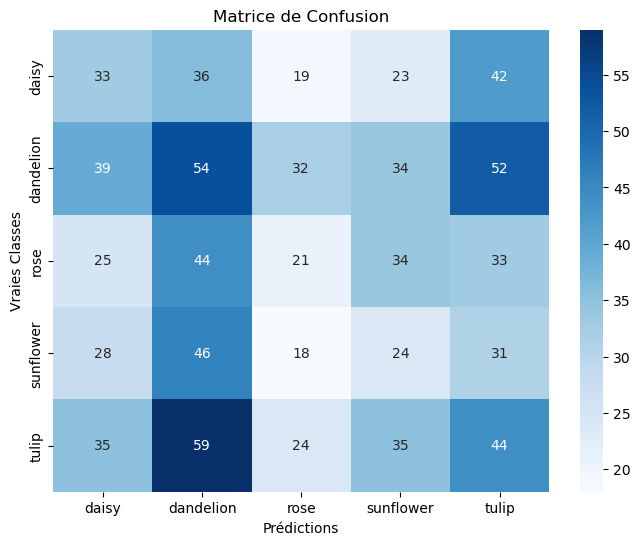

Rapport de Classification :

              precision    recall  f1-score   support

       daisy       0.21      0.22      0.21       153
   dandelion       0.23      0.26      0.24       211
        rose       0.18      0.13      0.15       157
   sunflower       0.16      0.16      0.16       147
       tulip       0.22      0.22      0.22       197

    accuracy                           0.20       865
   macro avg       0.20      0.20      0.20       865
weighted avg       0.20      0.20      0.20       865



In [65]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions sur l'ensemble de validation
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Vraies classes
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Matrice de confusion
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Affichage
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies Classes")
plt.show()

# Rapport de classification
print("Rapport de Classification :\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


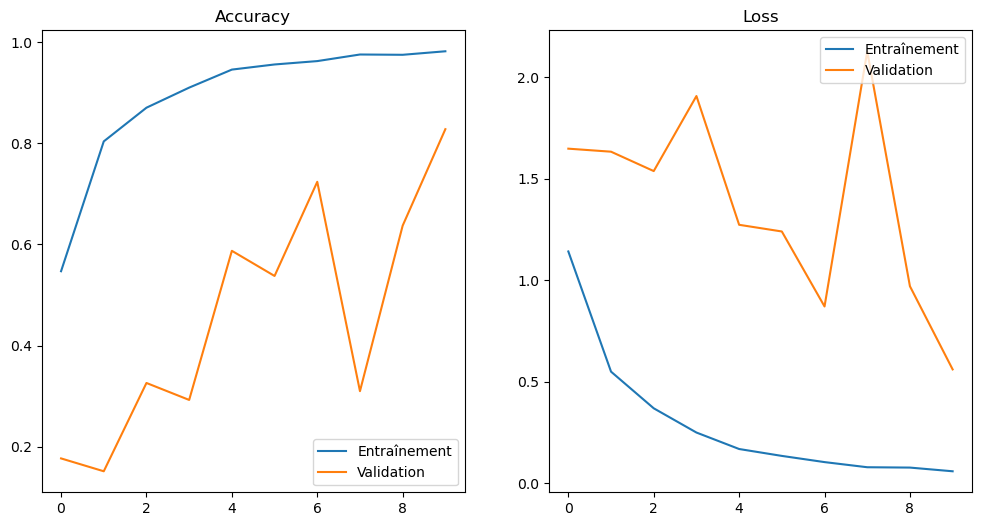

In [61]:
# Extraction des données d'entraînement
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Affichage des courbes
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Entraînement')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='lower right')
plt.title("Accuracy")

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Entraînement')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc='upper right')
plt.title("Loss")

plt.show()


## 7. Test sur des images supplémentaires

Nous ajoutons quelques images de fleurs téléchargées depuis Internet et évaluons le modèle dessus.

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


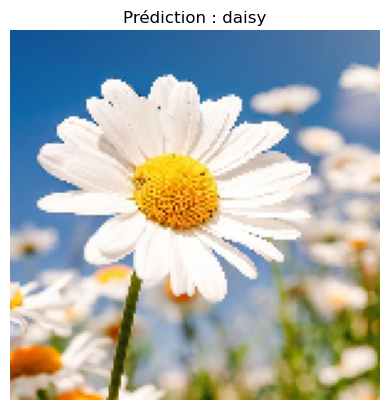

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


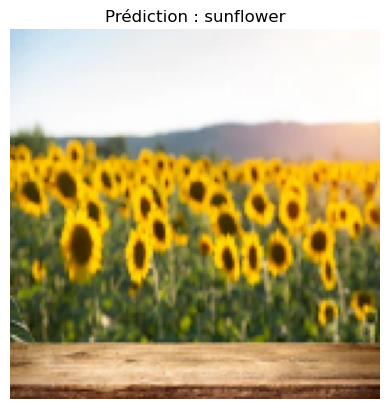

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


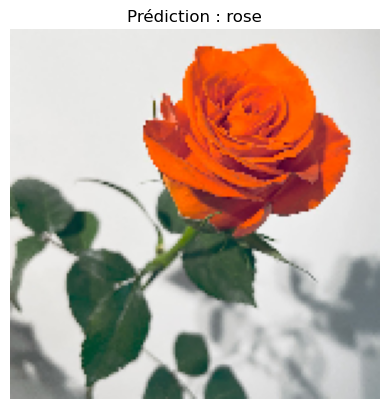

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


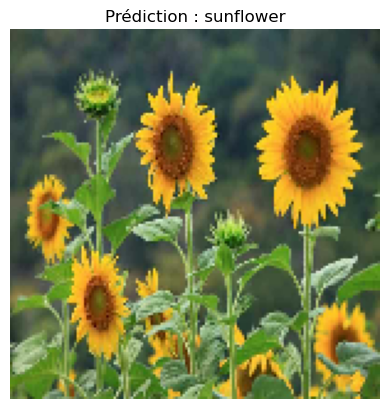

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


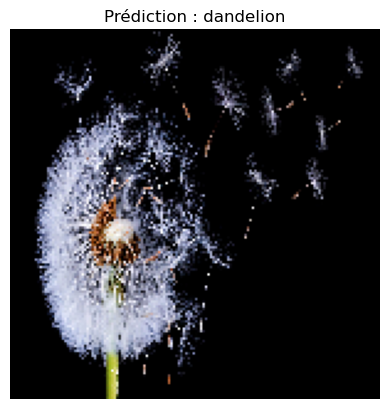

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


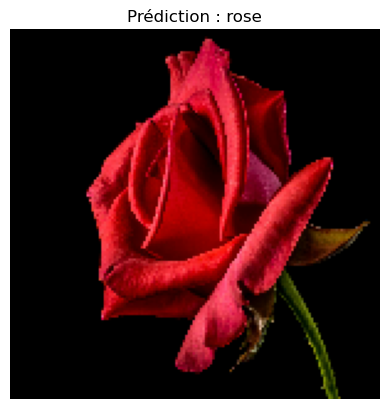

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


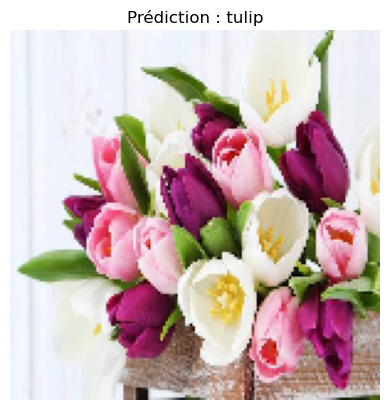

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


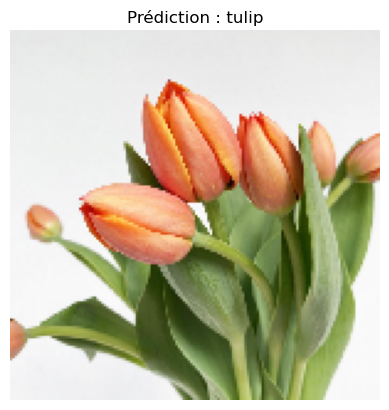

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


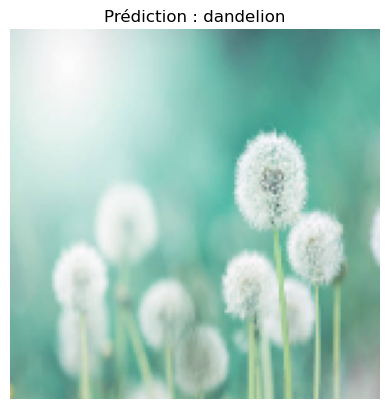

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


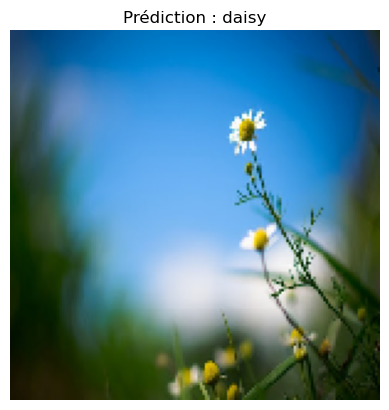

Prédictions pour les nouvelles images :
image1.jpg -> daisy
image10.png -> sunflower
image2.jpg -> rose
image3.jpg -> sunflower
image4.jpg -> dandelion
image5.jpg -> rose
image6.jpeg -> tulip
image7.jpg -> tulip
image8.jpg -> dandelion
image9.jpg -> daisy


In [35]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Dossier contenant les nouvelles images
new_images_dir = "NewFleurs"

# Parcourir les images du dossier
new_images = [f for f in os.listdir(new_images_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Taille des images attendues par le modèle
target_size = (150, 150)

# Dictionnaire des prédictions
predictions_dict = {}

# Prédire pour chaque image
for img_name in new_images:
    # Chemin complet de l'image
    img_path = os.path.join(new_images_dir, img_name)
    
    # Charger et prétraiter l'image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalisation
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension batch
    
    # Faire la prédiction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_name = classes[predicted_class]
    
    # Ajouter au dictionnaire
    predictions_dict[img_name] = class_name
    
    # Afficher l'image avec sa classe prédite
    plt.imshow(img)
    plt.title(f"Prédiction : {class_name}")
    plt.axis('off')
    plt.show()

# Résumé des prédictions
print("Prédictions pour les nouvelles images :")
for img_name, class_name in predictions_dict.items():
    print(f"{img_name} -> {class_name}")

In [43]:
# Dictionnaire des vraies classes
true_labels = {
    "image1.jpg": "daisy",
    "image2.jpg": "rose",
    "image3.jpg": "sunflower",
    "image4.jpg": "dandelion",
    "image5.jpg": "rose",
    "image6.jpeg": "tulip",
    "image7.jpg": "tulip",
    "image8.jpg": "dandelion",
    "image9.jpg": "daisy",
    "image10.png": "sunflower"
}


predicted_classes = []
true_classes = []
image_names = []

for img_name, true_class in true_labels.items():
    img_path = os.path.join(new_images_dir, img_name)
    
    # Charger et prétraiter l'image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Normalisation
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension batch
    
    # Faire la prédiction
    predictions = model.predict(img_array)
    predicted_class = classes[np.argmax(predictions, axis=1)[0]]
    
    # Stocker les vraies et prédictions
    predicted_classes.append(predicted_class)
    true_classes.append(true_class)
    image_names.append(img_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


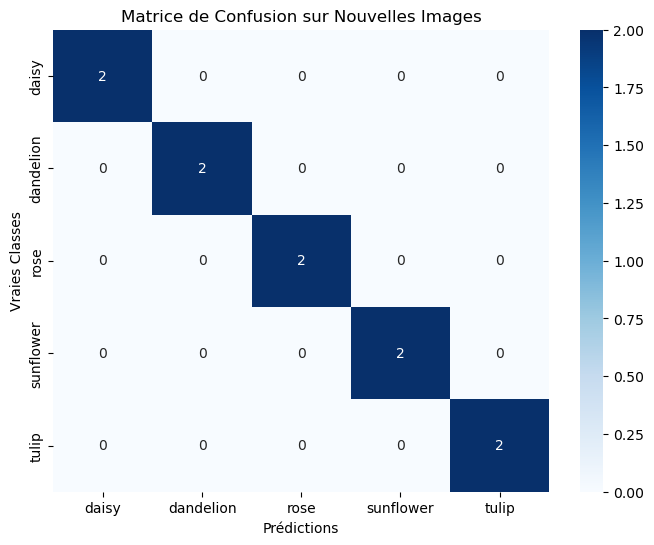

Rapport de Classification :

              precision    recall  f1-score   support

       daisy       1.00      1.00      1.00         2
   dandelion       1.00      1.00      1.00         2
        rose       1.00      1.00      1.00         2
   sunflower       1.00      1.00      1.00         2
       tulip       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
conf_matrix = confusion_matrix(true_classes, predicted_classes, labels=classes)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Matrice de Confusion sur Nouvelles Images")
plt.xlabel("Prédictions")
plt.ylabel("Vraies Classes")
plt.show()

# Rapport de classification
print("Rapport de Classification :\n")
print(classification_report(true_classes, predicted_classes, target_names=classes))


In [47]:
# Identifier les erreurs
for img_name, true, pred in zip(image_names, true_classes, predicted_classes):
    if true != pred:
        print(f"Image: {img_name}, Vraie Classe: {true}, Prédite: {pred}")
        img_path = os.path.join(new_images_dir, img_name)
        img = image.load_img(img_path, target_size=(150, 150))
        plt.imshow(img)
        plt.title(f"Erreur: {true} -> {pred}")
        plt.axis('off')
        plt.show()

Les prédictions des nouvelles images sont faites en augmentant le fine tuning à 10 epochs mais j'ai fait plusieurs tests et à cause du temps imparti je me suis arrêter à 5 epochs pour envoyer le notebook.